# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
#from scipy.stats import linregress
import json

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Import API key
from api_keys import weather_api_key

# under VBA add this line to .iginore to gnore the push/ modification of the config.py file
# api_keys.py

In [3]:
# Output File CSV
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations-- numpy, generate 1500 lats, lngs a piece
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [5]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# the url info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [7]:
# url Query build
Q_url = f"{url}appid={weather_api_key}&units={units}&q="
## url = f"http://api.openweathermap.org/data/2.5/weather?units-imperial&APPID={weather_api_key}"

In [8]:
# Get city weather data
weather_response = requests.get(Q_url + city)
weather_json = weather_response.json()
# converts a Python object into a json string-- dumps
print(json.dumps(weather_json, indent=6))
#print(weather_json)

{
      "coord": {
            "lon": 34.2961,
            "lat": -12.9274
      },
      "weather": [
            {
                  "id": 500,
                  "main": "Rain",
                  "description": "light rain",
                  "icon": "10n"
            }
      ],
      "base": "stations",
      "main": {
            "temp": 22.48,
            "feels_like": 23.13,
            "temp_min": 22.48,
            "temp_max": 22.48,
            "pressure": 1011,
            "humidity": 90,
            "sea_level": 1011,
            "grnd_level": 956
      },
      "visibility": 10000,
      "wind": {
            "speed": 1.22,
            "deg": 267,
            "gust": 1.42
      },
      "rain": {
            "1h": 0.21
      },
      "clouds": {
            "all": 100
      },
      "dt": 1644950304,
      "sys": {
            "country": "MW",
            "sunrise": 1644896502,
            "sunset": 1644941548
      },
      "timezone": 7200,
      "id": 924705,
      "name

In [9]:
# set empty for list of variables
city_name = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# start record counting
processing_record = 1 

# check if responsw correct
print(weather_response)
#print(cities)

<Response [200]>


In [10]:
# data retrive process start

# print to logger
print(f"Beginning Data Retrieval      ")
print(f"------------------------------")

# Loop through each city
for city in cities:
    
    # try to get the response for each city
    try:
        #run API requests and retrive the data
        response = requests.get(Q_url + city).json()
        
        ## add a time delay to avoid blowing out the API key
        #time.sleep(1)
        
        city_name.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # increase record counting by 1
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    pass

print(f"------------------------------")
print(f"Data Retrieval Complete!!    ")
print(f"------------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 | Qaanaaq
Processing Record 2 | Longyearbyen
Processing Record 3 | Busselton
Processing Record 4 | Ancud
City not found. Skipping...
Processing Record 5 | Cape Town
Processing Record 6 | Bethel
Processing Record 7 | Avarua
City not found. Skipping...
Processing Record 8 | Tarancón
Processing Record 9 | Albany
City not found. Skipping...
Processing Record 10 | Mataura
Processing Record 11 | Caucayá
Processing Record 12 | Punta Arenas
City not found. Skipping...
Processing Record 13 | Khovd
Processing Record 14 | Emerald
Processing Record 15 | Rikitea
City not found. Skipping...
Processing Record 16 | Tilichiki
Processing Record 17 | East London
City not found. Skipping...
Processing Record 18 | Mandera
Processing Record 19 | Atuona
Processing Record 20 | Tambura
Processing Record 21 | Kuito
Processing Record 22 | Fomboni
Processing Record 23 | Marquette
Processing Record 24 | Mar del Plata
Processing Recor

Processing Record 229 | Jacareacanga
Processing Record 230 | College
Processing Record 231 | Burayevo
Processing Record 232 | Galesong
Processing Record 233 | Acapulco de Juárez
Processing Record 234 | Kaitangata
Processing Record 235 | Ixtapa
Processing Record 236 | Winnemucca
Processing Record 237 | Xining
Processing Record 238 | Suez
Processing Record 239 | Tuktoyaktuk
Processing Record 240 | Cidreira
Processing Record 241 | Griffith
Processing Record 242 | Tiksi
Processing Record 243 | Port Macquarie
Processing Record 244 | Tocopilla
Processing Record 245 | St. George's
Processing Record 246 | São José da Coroa Grande
Processing Record 247 | Buraidah
Processing Record 248 | Atar
Processing Record 249 | Khātra
Processing Record 250 | Samarai
Processing Record 251 | Chokurdakh
Processing Record 252 | Rio Grande
Processing Record 253 | Hammerfest
Processing Record 254 | Chui
Processing Record 255 | Evensk
Processing Record 256 | Pahrump
Processing Record 257 | Lębork
Processing Record

Processing Record 459 | Tomatlán
Processing Record 460 | Lochgilphead
Processing Record 461 | Kruisfontein
Processing Record 462 | Tsumeb
Processing Record 463 | Mumbwa
City not found. Skipping...
Processing Record 464 | Skibbereen
Processing Record 465 | Kupang
Processing Record 466 | Acarí
Processing Record 467 | Tiruchchendur
Processing Record 468 | Dingle
Processing Record 469 | Lázaro Cárdenas
Processing Record 470 | Darnah
Processing Record 471 | Kuala Selangor
Processing Record 472 | Nelson Bay
Processing Record 473 | Nardaran
Processing Record 474 | Kysyl-Syr
Processing Record 475 | Nandigāma
Processing Record 476 | Kyra
Processing Record 477 | Ketchikan
Processing Record 478 | Kirya
Processing Record 479 | Charlestown
Processing Record 480 | Tepalcatepec
Processing Record 481 | Airai
Processing Record 482 | Tura
Processing Record 483 | Northam
Processing Record 484 | Altay
Processing Record 485 | Mossamedes
Processing Record 486 | Kiruna
Processing Record 487 | George Town
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# define dataframe then display
weather_data = {
    "City": city_name,
    "Latitude": latitude,
    "Longitude": longitude,
    "Temp": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weatherDF = pd.DataFrame(weather_data)

weatherDF.head()

,City,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,-27.80,79,95,2.96,GL,1644950304
1,Longyearbyen,78.2186,15.6401,-9.09,86,100,3.60,SJ,1644950304
2,Busselton,-33.6500,115.3333,20.58,74,0,5.07,AU,1644950305
3,Ancud,-41.8697,-73.8203,17.29,81,100,4.44,CL,1644950305
4,Cape Town,-33.9258,18.4232,21.77,72,20,4.63,ZA,1644950249


In [12]:
# export data to CSV file
weatherDF.to_csv("Weather_Output.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Date
# count	550.000000	550.000000	550.000000	550.000000	550.000000	550.000000	5.500000e+02

In [14]:
# Get the indices of cities that have humidity over 100%.
# Int64Index([], dtype='int64')

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
# 0	butaritari	3.07	172.79	83.32	74	84	10.42	KI	1593605283

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [16]:
## Create a series of scatter plots to showcase the following relationships:
#  Temperature (F) vs. Latitude
#  Humidity (%) vs. Latitude
#  Cloudiness (%) vs. Latitude
#  Wind Speed (mph) vs. Latitude

In [17]:
## Save plot to the selected directory. If the directory does not exist, it is created.

#import os
#import matplotlib.pyplot as plt

#script_dir = os.path.dirname(__file__)
#results_dir = os.path.join(script_dir, 'Results/')
#plot_file_name = "CityLatitude_vs_Temperature"

#if not os.path.isdir(results_dir):
#    os.makedirs(results_dir)

#plt.plot([1,2,3,4])
#plt.ylabel('some numbers')
#plt.savefig(results_dir + sample_file_name)

## Latitude vs. Temperature Plot

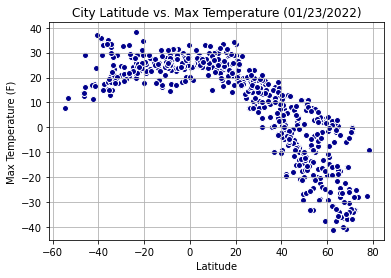

The relationship between City Latitude and Temperature shows as the scatter plot above. 

All latitude lines are parallel from East to West as circles to the equator, 
Temperature is inversely related to latitude.  
As latitude increases, the temperature falls, and vice versa. 



In [18]:
# Create a scatter plot for Temperature (F) vs. Latitude
plt.scatter(weatherDF['Latitude'], weatherDF["Temp"], facecolors = "darkblue", edgecolor ="white", marker="o")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (01/23/2022)")

# save plot as png file before show
plt.savefig("CityLatitude_vs_Temp.png")

plt.grid()
plt.show()

# bold print '\033[1m'+ words +'\033[0m'
print('\033[1m' +"The relationship between City Latitude and Temperature shows as the scatter plot above. \n" 
      "\n"
      "All latitude lines are parallel from East to West as circles to the equator, \n"
      "Temperature is inversely related to latitude.  \n"
      "As latitude increases, the temperature falls, and vice versa. \n"+'\033[0m')

## Latitude vs. Humidity Plot

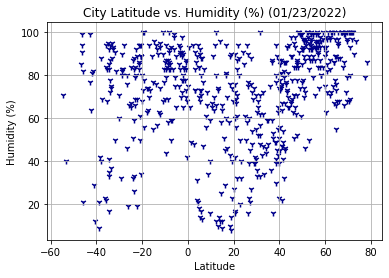

The relationship between City Latitude and Humidity shows as the scatter plot above. 
Since the humidity also meansures water vapor in the air, warm air can possess more water vapor (moisture)
then cold air, air will have a higher relative humidity if the air is cooler. The cities with higer Latitude 
will be moisture with the same amount of absolute/specific humidity, then the cities with lower latitude.



In [19]:
# Create a scatter plot for Humidity (%) vs. Latitude

plt.scatter(weatherDF["Latitude"], weatherDF["Humidity"], facecolors = "darkblue", edgecolor ="white", marker="1")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%) (01/23/2022)")

# save plot as png file
plt.savefig("CityLatitude_vs_Humidity.png")

plt.grid()
plt.show()

# bold print '\033[1m'+ words +'\033[0m'
print('\033[1m' +"The relationship between City Latitude and Humidity shows as the scatter plot above. \n" 
      "Since the humidity also meansures water vapor in the air, warm air can possess more water vapor (moisture)\n"
      "then cold air, air will have a higher relative humidity if the air is cooler. The cities with higer Latitude \n"
      "will be moisture with the same amount of absolute/specific humidity, then the cities with lower latitude.\n"
      +'\033[0m')

## Latitude vs. Cloudiness Plot

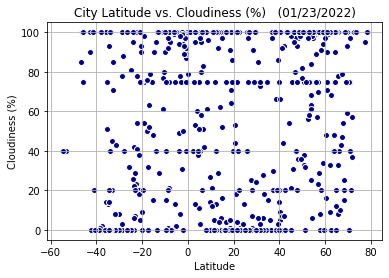

The relationship between City Latitude and Cloudiness (%) shows as the scatter plot above. 
Clouds tend to form in abundance in the middle latitudes to north and south of the equator.
There are three broad bands where Earth’s skies are most likely to be cloudy. 



In [20]:
# Create a scatter plot for Cloudiness (%) vs. Latitude

plt.scatter(weatherDF["Latitude"], weatherDF["Cloudiness"], facecolors = "darkblue", edgecolor ="white", marker="o")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%)   (01/23/2022)")

# save plot as png file before show
plt.savefig("CityLatitude_vs_Cloudiness.png")

plt.grid()
plt.show()

# bold print '\033[1m'+ words +'\033[0m'
print('\033[1m' +
      "The relationship between City Latitude and Cloudiness (%) shows as the scatter plot above. \n" 
      "Clouds tend to form in abundance in the middle latitudes to north and south of the equator.\n"
      "There are three broad bands where Earth’s skies are most likely to be cloudy. \n"
      +'\033[0m')

## Latitude vs. Wind Speed Plot

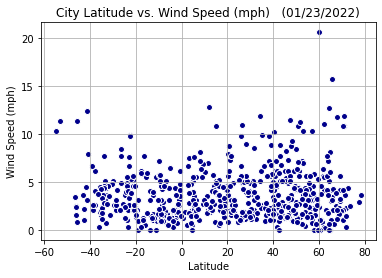

The relationship between City Latitude and Wind Speed (mph) shows as the scatter plot above. 
the speed of wind is determined by the magnitude of the air pressure difference make the air move 
from high pressure to low.  with greater speeds resulting from greater air pressure differences.
Observations show that the wind speed increases equatorward in low latitudes while the wind speed decreases. 



In [21]:
#Create a scatter plot for Wind Speed (mph) vs. Latitude

plt.scatter(weatherDF["Latitude"], weatherDF["Wind Speed"], facecolors = "darkblue", edgecolor ="white", marker="o")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (mph)   (01/23/2022)")

# save plot as png file
plt.savefig("CityLatitude_vs_WindSpeed.png")

plt.grid()
plt.show()

# bold print '\033[1m'+ words +'\033[0m'
print('\033[1m' +
      "The relationship between City Latitude and Wind Speed (mph) shows as the scatter plot above. \n" 
      "the speed of wind is determined by the magnitude of the air pressure difference make the air move \n"
      "from high pressure to low.  with greater speeds resulting from greater air pressure differences.\n"
      "Observations show that the wind speed increases equatorward in low latitudes while the wind speed decreases. \n"
      +'\033[0m')

## Linear Regression

In [22]:
# Separate the plots into Northern Hemisphere (>=0 degrees latitude) and Southern Hemisphere (<0 degrees latitude):

#Northern Hemisphere - Temperature (F) vs. Latitude
#Southern Hemisphere - Temperature (F) vs. Latitude
#Northern Hemisphere - Humidity (%) vs. Latitude
#Southern Hemisphere - Humidity (%) vs. Latitude
#Northern Hemisphere - Cloudiness (%) vs. Latitude
#Southern Hemisphere - Cloudiness (%) vs. Latitude
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
#Southern Hemisphere - Wind Speed (mph) vs. Latitude

# explain what the linear regression is modeling. Describe any relationships and any other analysis

#final notebook must:
# Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
# Perform a weather check on each of the cities using a series of successive API calls.
# Include a print log of each city as it's being processed with the city number and city name.
# Save a CSV of all retrieved data and a PNG image for each scatter plot.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

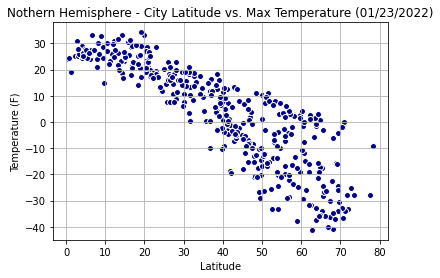

In [23]:
# create dataframe for northern hemisphere
N_hemisphere = weatherDF.loc[weatherDF["Latitude"] >= 0]

# Create a scatter plot for latitude vs temperature for northern hemisphere
x_values = N_hemisphere["Latitude"]
y_values = N_hemisphere["Temp"]
plt.scatter(x_values, y_values, facecolors="darkblue", marker="o", edgecolor="white")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title("Nothern Hemisphere - City Latitude vs. Max Temperature (01/23/2022)")

plt.grid()
plt.show()

In [24]:
# Perform a linear regression on Max temperature vs. latitude for Northern hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# caculate regression values
regress_values = x_values * slope + intercept
print(regress_values)

0     -28.507807
1     -29.113440
5       1.264988
7       2.388451
8       0.251835
         ...    
576    -6.859692
577    17.679565
578    11.375164
583    -2.534109
584   -21.691924
Name: Latitude, Length: 398, dtype: float64


In [25]:
# result of line equation string
line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_equation)

y = -0.82x +35.37


In [ ]:
# Create plot for Northern hemisphere
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

#plt.text(1,1,line_equation, color='red')
plt.annotate(line_equation,(0,0),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# save plot as png file
plt.savefig("N_hemisphere_CityLatitude_vs_Temp.png")

plt.grid()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# create dataframe for Southern Hemisphere
S_hemisphere = weatherDF.loc[weatherDF["Latitude"] < 0]

# Create a scatter plot for latitude vs temperature for northern hemisphere
x_values = S_hemisphere["Latitude"]
y_values = S_hemisphere["Temp"]
plt.scatter(x_values, y_values, facecolors="darkblue", marker="o", edgecolor="white")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title("Southern Hemisphere - City Latitude vs. Max Temperature (01/23/2022)")

plt.grid()
plt.show()

In [ ]:
# Perform a linear regression on Max temperature vs. latitude for Southern hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# caculate regression values
regress_values = x_values * slope + intercept
print(regress_values)

In [ ]:
# result of line equation string
line_equation1 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_equation1)

In [ ]:
# Create plot for Southern Hemisphere
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Tempe")

plt.scatter(x_values, y_values, facecolors="darkblue", marker="o", edgecolor="white")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Southern Hemisphere - City Latitude vs. Max Temperature (01/23/2022)")

#plt.text(0,0,line_equation1, color='red')
plt.annotate({line_equation1},(0,0),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# save plot as png file
plt.savefig("S_Hemi_CityLatitude_vs_MaxTemp_LinearReg")

plt.grid()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression